   # Capstone 2  ----- Fake and Real News Detection -----
   ## Milestone Report
   ## Data Science Career Track
   ### by Sara Satti....August 2020<br>
   
   # ==========================================================

## OUTLINE

## Introduction

## Summary

## 1. Data Loading & Wrangling:
### Explore 'Fake' Dataset:
### Clean 'Fake' Dataframe:
   > #### Step 1. Clean Columns
   > #### Step 2. Remove Duplicates
   > #### Step 3. Feature Engineering
 
### Explore 'Real' Dataset:
### Clean 'Real' Dataframe:
   > #### Step1. Clean Columns
   > #### Step2. Remove Duplicates
   > #### Step3. Feature Engineering
    
## 2. Exploratory Data Analysis (EDA):
   > #### Label and Combine Fake&Real news datasets
   > #### Check for Imbalance
   > #### Save Combined dataset
   > #### EDA Plots
        >> #### Title&Text Word Length
        >> #### Number of News Articles by day/month/year
   > #### WordCloud
        

## 3. Next Step: Modeling & Evaluation:


## Introduction:
Fake news prediction is a complicated problem with many variables to consider, such as the type of news, language the news was written in and geographic coverage, to name a few. For this reason, the project will take an incremental approach. This being a learning process, I will start simple, and build towards more complex approaches, until a suitable solution is reached (or the project timelimit attained). <br>

## Summary:

Fake/Real datasets were loaded and explored for null_values, proper datatype(e.g. presence of text in the date column), duplication, and imbalance. <br>

First, the **Fake dataset**:
_ The Fake dataset was unclean with 'http' data in several columns, non-dates in the 'date' column, and duplicate rows in the title and text columns. <br>
_ The 'date' column was cleaned of text data, and converted to datetime. <br>
_ Duplicate rows (on the basis of title, followed by text) were removed.<br>
_ Empty non-null cells were noted in the data, but were not handled, at this point.<br>
_ The data was labeled prior to appending with the Real dataset.<br>

**Real dataset**:
This dataset was cleaner and only required duplicate rows removal, label tagging, and conversion fo the date column to datetime, prior to concatinating with the Fake dataset.<br> Only ONE row had an anomalous title_length that was removed in the 2nd round of editing.
Both Fake and Real cleaned datasets were checked for balance. Before cleaning, there were 23,471 rows of Fake news and 21,417 rows of Real news. After cleaning the respective numbers are 17,444 and 20,821.<br>

The cleaned, appended data were saved as **Fake_and_Realnews_clean.csv**<br>
More cleaning was done on the appended data to remove text_lengths <=45 characters. This included text starting with http, and \*, one word and whitespace text.<br>
The output was stored as **allnews_extra_title_clean.csv**.

**EDA:**
   + Fake news has longer titles, but the same size of text as Real news.
   + The number of real news articles drops during the weekend, but fake news is consistent throughout the week.
   + The *volume* of real news is higher during the week than fake news, but this relationship is flipped on weekends.
   + There is more real news than fake news(more than double the amount) in the months September-December. However, there is more fake news than real for the rest of the year.
   + The year 2016 (an election year) had *double* the amount of fake news than real news.
   + 2017 had a higher volume of news overall than 2016, but the fake news was 2.5 times *less than* real news.<br>
   
   **WordClouds**
       * Fake news before cleaning, the most commom words were: Turkey, Syria, will, media, one, December,isis.
       After cleaning most common words: the Hammond, Emanuel, December, federal, BLM, ranch. <br>
       * Real news most common words before cleaning: Trump, said, Republican, President, transgender, Russia, administration.
       After cleaning: the same.<br>
       
The next step is building supervised machine learning models to predict whether a news article or title is true or fake. Two files will be used as input:  Fake_and_Realnews_clean.csv and allnews_extra_title_clean.csv.

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from datetime import datetime
from dateutil.parser import parse

In [145]:
import nltk

In [146]:
pd.set_option('display.max_rows', None)

sns.set(rc={'figure.figsize':(8, 4)}, style='whitegrid')

In [147]:
# load datasets
Fake = pd.read_csv('Fake.csv')
Real = pd.read_csv('True.csv')

In [148]:
def drop_duplicaterows(df, col1, col2):
    """ Function drops duplicate rows in a dataframe based on
    'col1' and 'col2'."""
    
    drop_duplicates1 = df.drop_duplicates(subset=col1, keep='first')
    no_duplicates = drop_duplicates1.drop_duplicates(subset=col2, keep='first')
    
    #print(real_drop_duplicates2.info())
    
    return no_duplicates

### Explore Fake dataset:

In [149]:
Fake.head(3)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"


In [150]:
Fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [151]:
Fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [152]:
Fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [153]:
Fake.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [154]:
#Explore how many news articles are present for each available date
# This also highlights anomalous 'date' column values

Fake.groupby(['date']).count()

,title,text,subject
date,,,
14-Feb-18,1,1,1
15-Feb-18,9,9,9
16-Feb-18,8,8,8
17-Feb-18,7,7,7
18-Feb-18,7,7,7
19-Feb-18,3,3,3
"Apr 1, 2015",2,2,2
"Apr 1, 2016",12,12,12
"Apr 1, 2017",13,13,13


### Clean Fake DataFrame:

#### Clean Columns:

In [155]:
# Find date values that startwithMS'
bool_series = Fake['date'].str.startswith('MS', na=False) 

#Display dataframe with date=url
Fake[bool_series]


,title,text,subject,date
18933,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...


In [156]:
# Find date values that are 'urls'
bool_series = Fake['date'].str.startswith('http', na=False) 

#Display dataframe with date=url
Fake[bool_series]


,title,text,subject,date
9358,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...
15507,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...
15508,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...
15839,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...
15840,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...
17432,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...
17433,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...
21869,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...
21870,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...


In [157]:
# Remove anomalous data from Fake dataframe
Fake_new = Fake.drop([9358, 15507, 15508, 15839, 15840, 17432, 17433, 18933, 21869, 21870])

# check for data removal
print('Fake dataframe BEFORE "url" removal'', ',Fake.info(), '\n\n')
print('Fake dataframe AFTER "url" removal', Fake_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
Fake dataframe BEFORE "url" removal,  None 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23471 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23471 non-null  object
 1   text     23471 non-null  object
 2   subject  23471 non-null  object
 3   date     23471 non-null  object
dtypes: object(4)
memory usage: 916.8+ KB
Fake dataframe AFTER "url" removal None


In [158]:
# Convert date column to datetime:
Fake_new['date'] = pd.to_datetime(Fake_new['date'])

#### 2. Remove Duplicate rows

In [159]:
# get rid of duplicate rows (based on 'title' and 'text' columns only):
Fake_new_dropduplicates = drop_duplicaterows(Fake_new, 'title', 'text')

In [160]:
Fake_new_dropduplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17444 entries, 0 to 22702
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    17444 non-null  object        
 1   text     17444 non-null  object        
 2   subject  17444 non-null  object        
 3   date     17444 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 681.4+ KB


#### 3. Feature Engineering

In [161]:
def feature_eng(df, date_col):
    """ Function to calculate extra features from the date column.
    Ouputs: day_of_week, month and year. """
    
    # day_of_week
    df['day_of_week'] = df[date_col].dt.day_name()
    
    # month
    df['month'] = df[date_col].dt.month
    
    # year
    df['year'] = df[date_col].dt.year
    
    return df

In [162]:
def title_text_length(df, title_col, text_col):
    
    """ Calculate the length of title and text data in each cell """
    
    # title_length
    df['title_length'] = df[title_col].apply(len)
    
    #text_length
    df['text_length'] =  df[text_col].apply(len)
    
    return df

In [163]:
Fake_new_dropdup_features1 = feature_eng(Fake_new_dropduplicates, 'date')

In [164]:
Fake_new_dropdup_features2 = title_text_length(Fake_new_dropdup_features1, 'title', 'text')

In [165]:
Fake_new_dropdup_features2.describe()

,month,year,title_length,text_length
count,17444.000000,17444.000000,17444.000000,17444.000000
mean,6.164183,2016.290759,91.216751,2549.794944
std,3.398016,0.627088,24.507293,2199.272650
min,1.000000,2015.000000,15.000000,1.000000
25%,3.000000,2016.000000,77.000000,1650.000000
50%,6.000000,2016.000000,88.000000,2235.000000
75%,9.000000,2017.000000,100.000000,3006.000000
max,12.000000,2018.000000,286.000000,51794.000000


### Explore Real Dataset:

In [166]:
Real.head(3)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [167]:
Real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [168]:
Real.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [169]:
Real.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [170]:
Real.subject.unique()

array(['politicsNews', 'worldnews'], dtype=object)

#### Step 1. Clean Columns

In [171]:
# groupby date for easier exploration of anomalous values

Real.groupby('date').count()

,title,text,subject
date,,,
"April 1, 2016",14,14,14
"April 1, 2017",2,2,2
"April 10, 2016",3,3,3
"April 10, 2017",15,15,15
"April 11, 2016",13,13,13
"April 11, 2017",15,15,15
"April 12, 2016",16,16,16
"April 12, 2017",31,31,31
"April 13, 2016",21,21,21


In [172]:
# Find date values that are 'urls'
bool_series = Real['date'].str.startswith('http', na=False)
#bool_series = Real['date'].str.startswith('MS', na=False)

#Display dataframe with date=url
Real[bool_series]


,title,text,subject,date


In [173]:
Real['date'] = pd.to_datetime(Real['date'])

#### Step 2: Remove Duplicates:

In [174]:
# get rid of duplicate rows:
Real_new_dropduplicates = drop_duplicaterows(Real, 'title', 'text')

In [175]:
print(Real_new_dropduplicates.info(),'\n') # check info( before and after dropduplicates)
print(Real.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20821 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    20821 non-null  object        
 1   text     20821 non-null  object        
 2   subject  20821 non-null  object        
 3   date     20821 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 813.3+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    21417 non-null  object        
 1   text     21417 non-null  object        
 2   subject  21417 non-null  object        
 3   date     21417 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 669.4+ KB
None


In [176]:
Real_new_dropduplicates.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29


In [177]:
Real_new_dropdup_features1 = feature_eng(Real_new_dropduplicates, 'date')

In [178]:
Real_new_dropdup_features2 = title_text_length(Real_new_dropdup_features1, 'title', 'text')

In [179]:
Real_new_dropdup_features2.describe()

,month,year,title_length,text_length
count,20821.000000,20821.000000,20821.000000,20821.000000
mean,8.199078,2016.776668,64.671293,2368.044378
std,3.354509,0.416489,9.150026,1666.874381
min,1.000000,2016.000000,26.000000,1.000000
25%,6.000000,2017.000000,59.000000,914.000000
50%,9.000000,2017.000000,64.000000,2214.000000
75%,11.000000,2017.000000,70.000000,3204.000000
max,12.000000,2017.000000,133.000000,29781.000000


#### Step 3: Feature Engineering

In [180]:
Real.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,2017-12-20 00:00:00
freq,14,8,11272,182
first,NaN,NaN,NaN,2016-01-13 00:00:00
last,NaN,NaN,NaN,2017-12-31 00:00:00


In [181]:
Real_new_dropdup_features2.describe()

,month,year,title_length,text_length
count,20821.000000,20821.000000,20821.000000,20821.000000
mean,8.199078,2016.776668,64.671293,2368.044378
std,3.354509,0.416489,9.150026,1666.874381
min,1.000000,2016.000000,26.000000,1.000000
25%,6.000000,2017.000000,59.000000,914.000000
50%,9.000000,2017.000000,64.000000,2214.000000
75%,11.000000,2017.000000,70.000000,3204.000000
max,12.000000,2017.000000,133.000000,29781.000000


## 2. Exploratory Data Analysis (EDA)

#### Label and Combine Fake and Real datasets:

In [229]:
# Rename dataframes
fake_clean = Fake_new_dropdup_features2
real_clean = Real_new_dropdup_features2

# Add labels to newstype:
fake_clean['label'] = 0
real_clean['label'] = 1

#join into one dataframe
allnews = fake_clean.append(real_clean, ignore_index=True, verify_integrity=True)


In [230]:
allnews.head()

,title,text,subject,date,day_of_week,month,year,title_length,text_length,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,Sunday,12,2017,79,2893,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,Sunday,12,2017,69,1898,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,Saturday,12,2017,90,3597,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,Friday,12,2017,78,2774,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,Monday,12,2017,70,2346,0


#### Check Dataset is Balanced:

In [184]:
from collections import Counter

# Summarize label distribution
target2 = allnews['label']
counter2 = Counter(target2)
print(counter2)

Counter({1: 20821, 0: 17444})


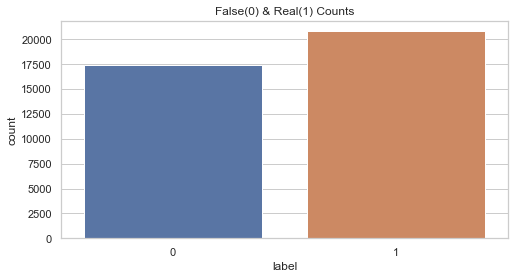

In [185]:
# Plot Fake and Real data count:
sns.countplot(data=allnews, x='label')
plt.title('False(0) & Real(1) Counts');

In [186]:
allnews.head()

,title,text,subject,date,day_of_week,month,year,title_length,text_length,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,Sunday,12,2017,79,2893,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,Sunday,12,2017,69,1898,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,Saturday,12,2017,90,3597,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,Friday,12,2017,78,2774,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,Monday,12,2017,70,2346,0


In [187]:
allnews.groupby('date').count().tail(3)

,title,text,subject,day_of_week,month,year,title_length,text_length,label
date,,,,,,,,,
2018-02-17,7,7,7,7,7,7,7,7,7
2018-02-18,7,7,7,7,7,7,7,7,7
2018-02-19,3,3,3,3,3,3,3,3,3


In [231]:
# Save new All dataframe to file:

#allnews.to_csv('Fake_and_Realnews_edited2_clean.csv')

#### Further Cleaning of 'title' column:

Check 'anomalously' short titles.

In [228]:
# Check Text_length column with short titles:
#<= 45 characters:

allnews[allnews['text_length'] <= 45]

,title,text,subject,date,day_of_week,month,year,title_length,text_length,label
10917,TAKE OUR POLL: Who Do You Think President Trum...,,politics,2017-05-10,Wednesday,5,2017,83,1,0
11108,MY FAVORITE EXCUSES…Featuring Hillary Rotten C...,Enjoy:,politics,2017-04-17,Monday,4,2017,60,6,0
11236,MELANIA TRUMP GIVES POWERFUL SPEECH to Honor ‘...,https://www.youtube.com/watch?v=cJZFepSvxzM,politics,2017-03-30,Thursday,3,2017,117,43,0
11266,TERRORISM EXPERT SEBASTIAN GORKA On What Next ...,https://www.youtube.com/watch?v=-7Tn4gi_Os8,politics,2017-03-26,Sunday,3,2017,80,43,0
11284,CRYBABY NANCY PELOSI Taunts Trump On Healthcar...,https://www.youtube.com/watch?v=SH0pRtK9sAE,politics,2017-03-24,Friday,3,2017,78,43,0
11285,SARA CARTER AND JAY SEKULOW With The Latest On...,https://www.youtube.com/watch?v=DRLVvYzG46w,politics,2017-03-24,Friday,3,2017,147,43,0
11290,HYSTERICAL! HERE’S WHY TRUMP SAID TO REPORTER:...,Read more:WT,politics,2017-03-23,Thursday,3,2017,77,12,0
11294,SARA CARTER WAS RIGHT ABOUT SPYING ON TRUMP! “...,https://www.youtube.com/watch?v=Ws5ojb0PCCo,politics,2017-03-23,Thursday,3,2017,98,43,0
11340,LIBERAL BIGOT Destroyed by Legendary Democrat ...,https://www.youtube.com/watch?v=P-TBfkqk7gU,politics,2017-03-16,Thursday,3,2017,141,43,0
11364,VIRAL VIDEO: UNIV OF WI Students Busted Agreei...,Watch the hypocrisy in action:,politics,2017-03-13,Monday,3,2017,136,30,0


In [236]:
# Drop rows with title_lengths less than n characters
n=45
bool_list=[]
for idx in allnews.index:
    if allnews['text_length'][idx] <= n:
        bool_list.append(idx),
df_out = allnews.drop(bool_list) 


In [250]:
print('Number of rows to be dropped', len(allnews[allnews['text_length'] <=45])) # rows to be dropped

Number of rows to be dropped 128


In [235]:
# Save as allnews_extra_title_clean
#df_out.to_csv('allnews_extra_title_clean.csv')

#### EDA Plots

#### Title and Text word Length:

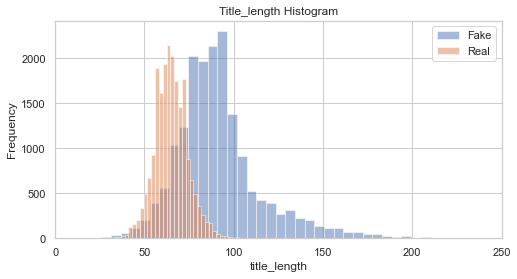

In [40]:
# Plot title_length counts

plt.hist(fake_clean['title_length'], bins=50, alpha=0.5, label='Fake')
plt.hist(real_clean['title_length'], bins=50, alpha=0.5, label='Real')
plt.title('Title_length Histogram')
plt.xlim(0, 250)
plt.xlabel('title_length')
plt.ylabel('Frequency')
plt.legend();

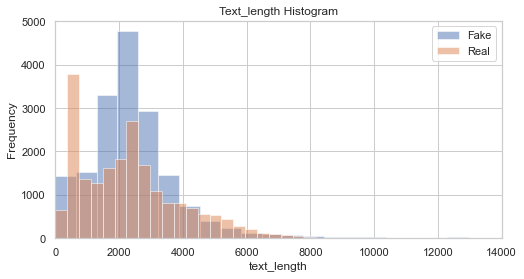

In [50]:
# Plot text_length counts

plt.hist(fake_clean['text_length'], bins=80, alpha=0.5, label='Fake')
plt.hist(real_clean['text_length'], bins=80, alpha=0.5, label='Real')
plt.title('Text_length Histogram')
plt.xlim(0, 14000)
plt.xlabel('text_length')
plt.ylabel('Frequency')
plt.legend();

#### Year, Month and Weekday Features:

In [176]:
allnews.head()

,title,text,subject,date,day_of_week,month,year,title_length,text_length,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,Sunday,12,2017,79,2893,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,Sunday,12,2017,69,1898,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,Saturday,12,2017,90,3597,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,Friday,12,2017,78,2774,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,Monday,12,2017,70,2346,0


#### Number of News articles by Week/month/year:

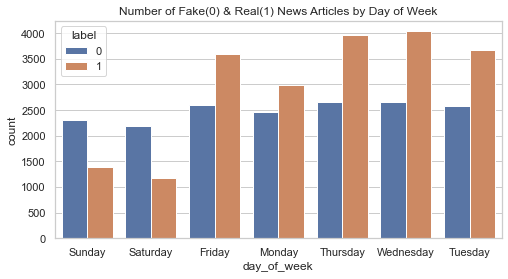

In [51]:
# Number of fake and real news articles by day of the week:

sns.countplot(allnews['day_of_week'],hue='label',data=allnews)
plt.title('Number of Fake(0) & Real(1) News Articles by Day of Week');

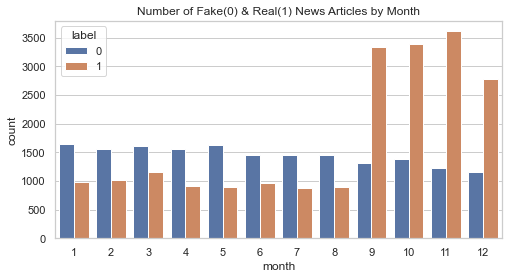

In [52]:
# Number of news articles by month:

sns.countplot(allnews['month'],hue='label',data=allnews)
plt.title('Number of Fake(0) & Real(1) News Articles by Month');

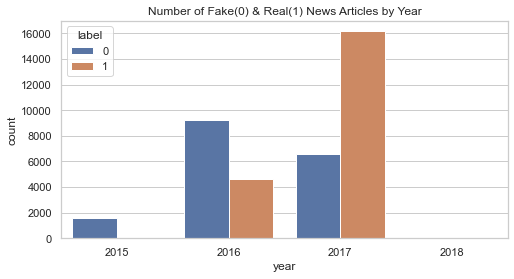

In [53]:
# Number of fake and real news articles by year:

sns.countplot(allnews['year'],hue='label',data=allnews)
plt.title('Number of Fake(0) & Real(1) News Articles by Year');

#### WordCloud:

In [166]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [167]:
def create_wordcloud(wordcloud_input):
    """ This function generates a word cloud, given 
    a dataframe column """

    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_words=100,background_color='white', stopwords=STOPWORDS).generate(str(wordcloud_input))
    fig = plt.figure(figsize =  (10,8))

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    return plt.show()

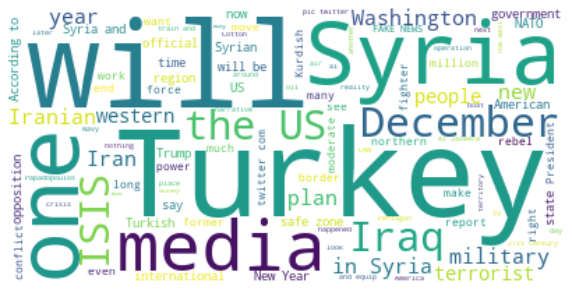

In [168]:
cloud_input =  Fake.text.values  # raw fake news data
create_wordcloud(cloud_input)

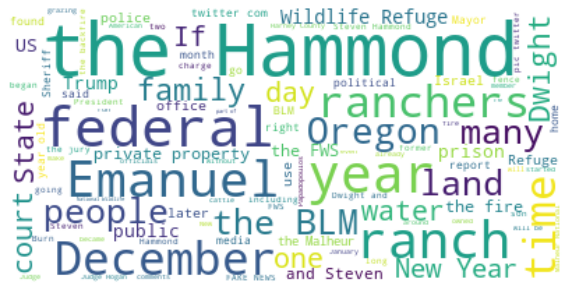

In [171]:
cloud_input =  fake_clean.text.values # fake news data after cleaning
create_wordcloud(cloud_input)

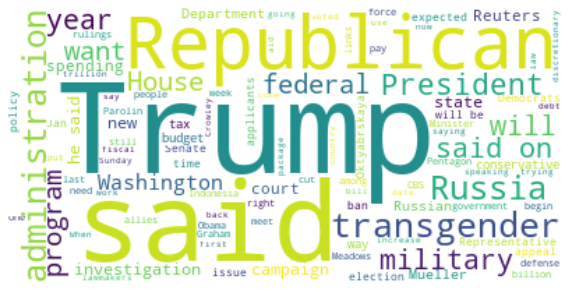

In [172]:
cloud_input =  Real.text.values  # raw real news data
create_wordcloud(cloud_input)

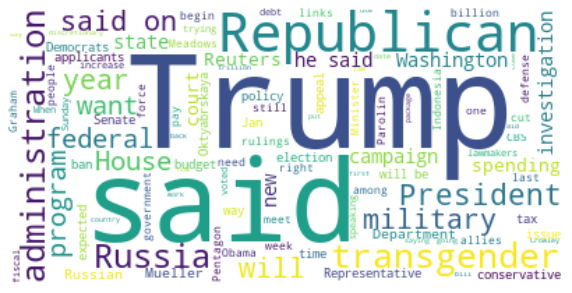

In [174]:
cloud_input =  real_clean.text.values  # real news data after removing duplicate rows
create_wordcloud(cloud_input)